## Momentum
#### Think momentum like  and ball on the top of the pothole and giving little push directly goes to the end of the hole which is global minimum and here it moves faster because the ball moves down the speed increases
#### It also work by giving the weight to the last occurred or calculated gradient
#### Here similar working like the ewma and same formula is applied but just small change
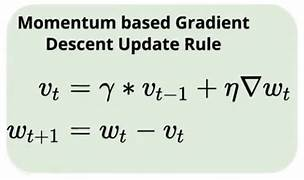

#### The main advantage of use of momentum with the stocastic gradient descent (sgd) optimizer is that it is fast compared to batch and mini batch gradient descent and works really great in the convex error curves by overcomming the problem like high curvature , sadle point (here the consistent gradient occures ) , local minimun (it overtakes with the help of high velocity)

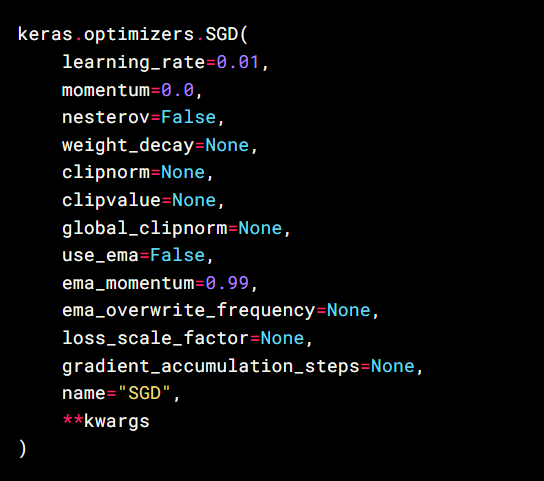

### To get the momentum in the keras we just set the momentum with the decay(beta) and nesterov = False

In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [3]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=100,noise=0.2515)

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [5]:
### building the model
model = Sequential([
    Dense(10,activation='relu',input_dim=2),
    Dense(5,activation='relu'),
    Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
### Compiling the model
momentum = SGD(
    learning_rate = 0.01,
    momentum = 0.9, ##beta=0.9
    nesterov = False
)
model.compile(optimizer=momentum,loss='binary_crossentropy')

In [9]:
history = model.fit(
    X_train,y_train,
    epochs=100
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.5295
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.5255
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4966
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4720
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4776
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4978
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4686
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4658
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.4592
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4499
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4528
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4478
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.4579
Epoch 14/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.4281
Epoch 15/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.4509
Epoch 16/100
3/3 ━━

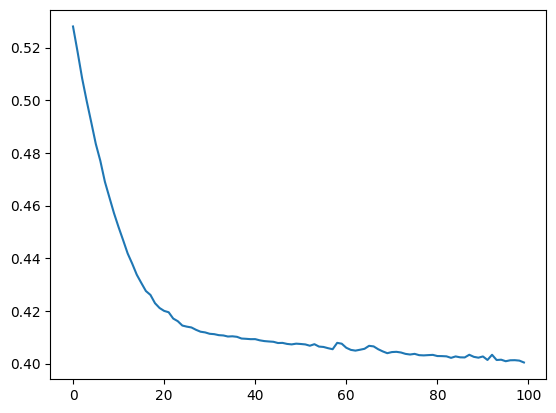

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

Here in the plot it is correctly seen that the some peaks are developed in the loss curve leading that the ball as jumped the curve but later restored